Monte Carlo: Forecasting the probabilistic returns of a portfolio

In [8]:
## Importing the necessary libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
##lognormal distribution to model the random walks of a financial asset
##arguments: mu - mean (expected return), sigma - standard deviation (implied volatility), size
mu = .00667 ## 8% expected return per year / 12months = expected return per month
sigma = .02083 ## 25% volatility per year / 12months = volatility per month
return_per_period = np.random.lognormal(mu,sigma,size = (12)) #size for 12 months in a year
return_per_period ## in percentage

array([ 0.98146243,  0.97305518,  1.01499285,  0.98967772,  0.99348364,
        0.97590529,  0.98765981,  1.0414277 ,  1.04695459,  1.03815752,
        0.98664795,  1.04782596])

In [39]:
starting_value = 1000  ##average trade size is $1000
portfolio_value = np.cumprod(return_per_period) * starting_value
portfolio_value ##array object with portfolio value for each month

array([  981.46242796,   955.01709703,   969.33552893,   959.32977918,
         953.07843659,   930.11428551,   918.63650156,   956.69349748,
        1001.6146513 ,  1039.83378271,  1025.94987135,  1075.01690974])

Now that we have modeled the returns for 12 months of the year, we want to repeat this 10,000 times

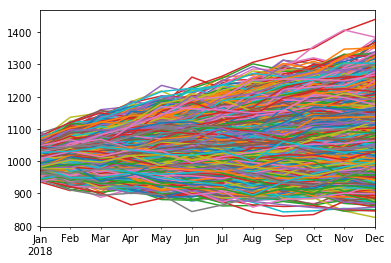

In [40]:
##creating a dataframe object called df that will take a dictionary arg
df = pd.DataFrame(
    np.cumprod( ##cumprod takes the cumulative products 
        np.random.lognormal(.00667,.02083,size =(12,10000)), ##running the simulation 10,000 times
      axis=0) * starting_value,
    index = pd.date_range(start='2018', periods=12, freq='MS') #frequency of monthstart
    )

##creating an axes object named ax that plots df
ax = df.plot()
ax.legend().remove() ##have to remove the legend of the graph
##plt.show() < this line is needed if not running in jupyter

Now we can plot the ending balances on a histogram to see the distribution of the expected portfolio value after a year

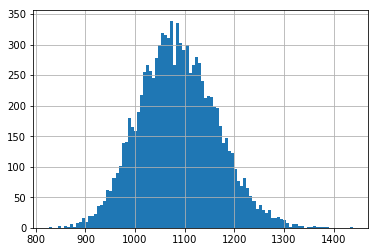

In [44]:
## indexing the final balance of each scenario into a series
ending_balances = df.iloc[-1]
ending_balances.hist(bins = 100)

Using the 68,95,99.7 rule to describute our expected outcomes.

In [49]:
ending_balances.describe(percentiles=[.003, .05, .32, .68, .95, .997])

count    10000.000000
mean      1086.448573
std         77.633308
min        825.670155
0.3%       893.038826
5%         964.436803
32%       1047.933500
50%       1083.705725
68%       1121.490505
95%       1219.025327
99.7%     1315.882292
max       1438.777481
Name: 2018-12-01 00:00:00, dtype: float64

With this information, we can model the expected price of an option using the portfolio values as steps in a binomial tree. 
We can use the Black-Scholes-Merton model to model this. 